In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

In [2]:
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output']
cars = pd.read_csv("https://raw.githubusercontent.com/gilbutITbook/080263/master/chap2/data/car_evaluation.csv", names=cols)

<Axes: ylabel='count'>

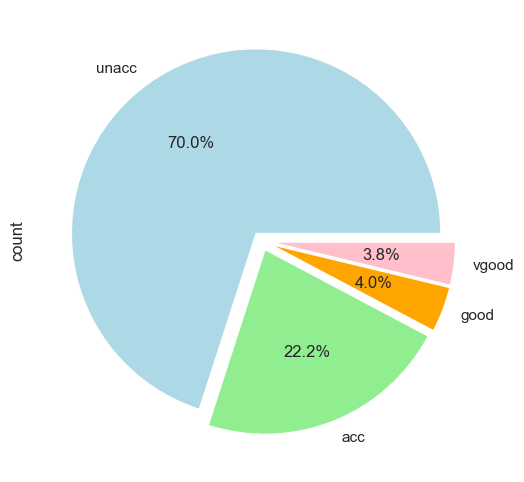

In [3]:
plt.rcParams['figure.figsize'] = [8, 6]
cars.output.value_counts().plot(kind='pie', autopct='%0.01f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05, 0.05))

In [4]:
price = pd.get_dummies(cars['price'], prefix='price')
maint = pd.get_dummies(cars['maint'], prefix='maint')
doors = pd.get_dummies(cars['doors'], prefix='doors')
persons = pd.get_dummies(cars['persons'], prefix='persons')
lug_capacity = pd.get_dummies(cars['lug_capacity'], prefix='lug_capacity')
safety = pd.get_dummies(cars['safety'], prefix='safety')
labels = pd.get_dummies(cars['output'], prefix='condition')

X = pd.concat([price, maint, doors, persons, lug_capacity, safety, labels], axis=1)
y = labels.values


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1382, 25), (346, 25), (1382, 4), (346, 4))

In [6]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

input_layer = Input(shape=(X.shape[1],))
dense_layer1 = Dense(15, activation='relu')(input_layer)
dense_layer2 = Dense(10, activation='relu')(dense_layer1)
output = Dense(y.shape[1], activation='softmax')(dense_layer2)

model = Model(inputs=input_layer, outputs=output)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            44 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 594 (2.32 KB)

 Trainable params: 594 (2.32 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.6140 - loss: 1.0866 - val_acc: 0.7834 - val_loss: 0.5735
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - acc: 0.8977 - loss: 0.3913 - val_acc: 0.8953 - val_loss: 0.2677
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - acc: 0.9245 - loss: 0.1772 - val_acc: 0.9061 - val_loss: 0.1686
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - acc: 0.9478 - loss: 0.0951 - val_acc: 0.9928 - val_loss: 0.1103
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - acc: 1.0000 - loss: 0.0638 - val_acc: 1.0000 - val_loss: 0.0644
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - acc: 1.0000 - loss: 0.0352 - val_acc: 1.0000 - val_loss: 0.0344
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - acc: 1.0000 - loss: 0.0174 - val_acc: 1.0000 - val_loss: 0.0196
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - acc: 1.0000 - loss: 0.0110 - val_acc: 1.0000 - val_loss: 0.0124
Epoch 9/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s

In [8]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score", score[0])
print("Test Accuracy", score[1])

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - acc: 1.0000 - loss: 4.1484e-05
Test Score 3.382424984010868e-05
Test Accuracy 1.0
